Źródło danych:
https://www.kaggle.com/datasets/shivam2503/diamonds?resource=download

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors    import KNeighborsRegressor
from sklearn.ensemble     import AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from joblib import dump

In [114]:
data = pd.read_csv("https://raw.githubusercontent.com/janszopa/Narzedzie_do_wyceny_produktow/main/aplikacja_prognozuj%C4%85ca/test_data/diamonds.csv")
data = data.drop(columns = ['Unnamed: 0'])
print("l.obiektów: ", data.shape[0], "\nl.atrybutów: ", data.shape[1])
data

l.obiektów:  53940 
l.atrybutów:  10


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [115]:
data.info()
print("\nBraki w danych:\n",data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB

Braki w danych:
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [116]:
#Nie widzimy żadnych braków w badanych danych.

In [117]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [118]:
#Zauważamy pewną anomalię przy wartościach minimalnych, występują diamenty o wymiarach x,y,z równych 0. 

In [119]:
invalidData=data.loc[(data['x']==0) | (data['y']==0) | (data['z']==0)]
print("Liczba niepoprwanych danych: ", invalidData.shape[0])
invalidData

Liczba niepoprwanych danych:  20


,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [120]:
#Liczba wadliwych danych w porównaniu do całego zbioru jest bardzo mała. 
#Do dalszej analizy zwyczajnie je usuwam.
data=data[(data[['x','y','z']] != 0).all(axis=1)]

#Sprawdzam czy liczba obiektów zmniejszyła się dokładnie o 20
#oraz czy w wartościach min x,y,z nie występuje już 0
print("l.obiektów: ", data.shape[0])
data.describe()

l.obiektów:  53920


,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [121]:
#Wszystko się zgadza

<Axes: xlabel='clarity', ylabel='price'>

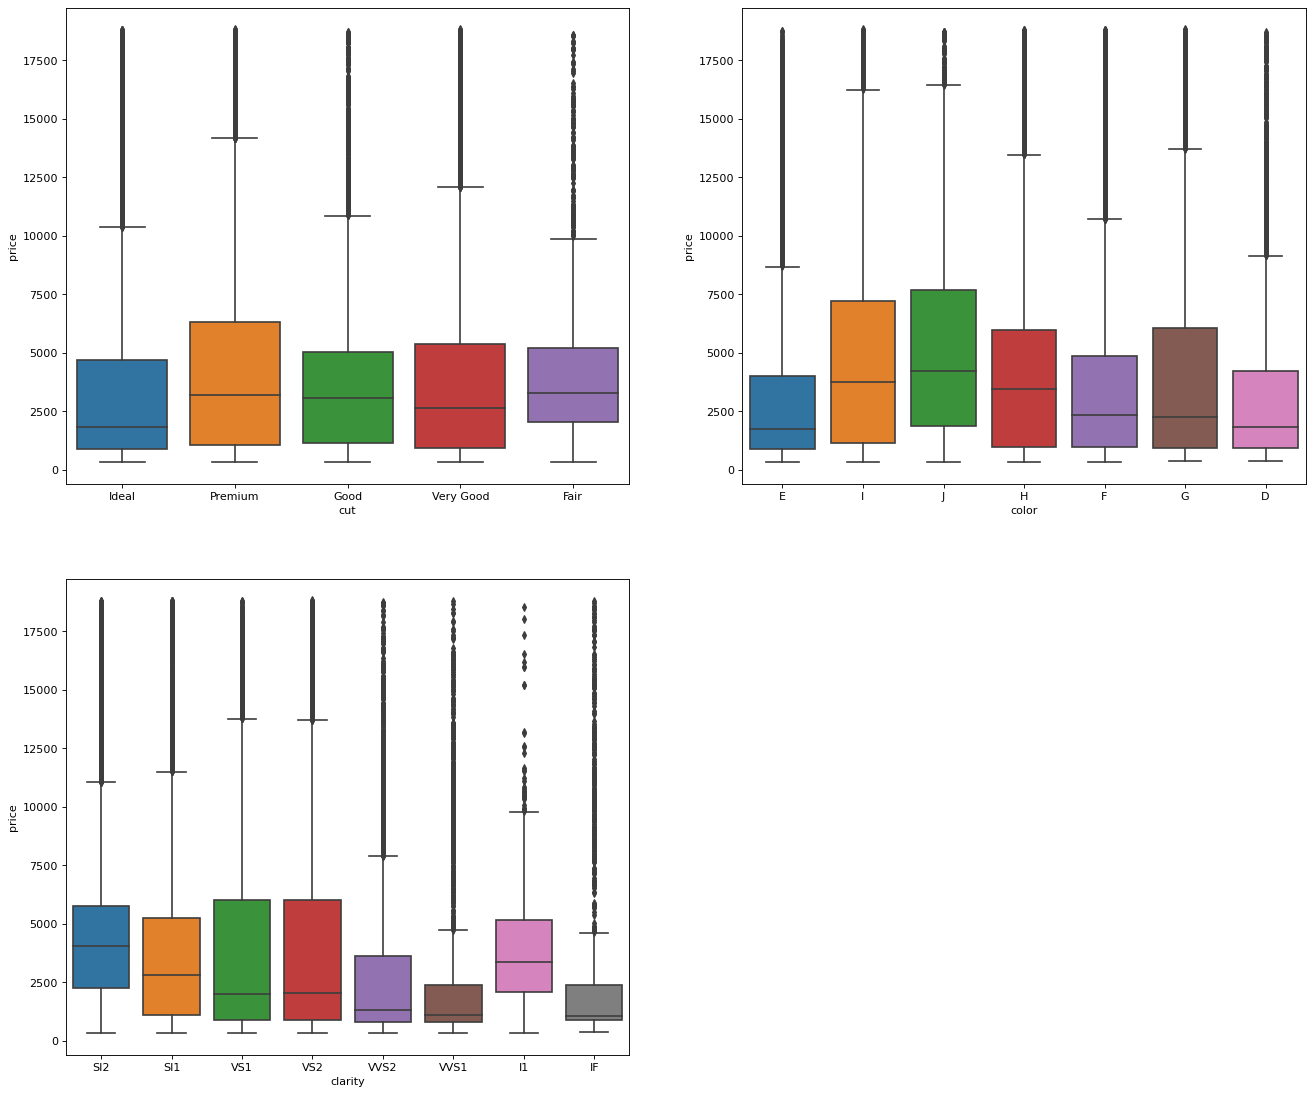

In [122]:
plt.figure(figsize=(20,17), dpi= 80)
plt.subplot(2,2,1)
sns.boxplot(x=data['cut'] , y=data['price'])
plt.subplot(2,2,2)
sns.boxplot(x=data['color'] , y=data['price'])
plt.subplot(2,2,3)
sns.boxplot(x=data['clarity'] , y=data['price'])

/Users/mikolajguzek-szopa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


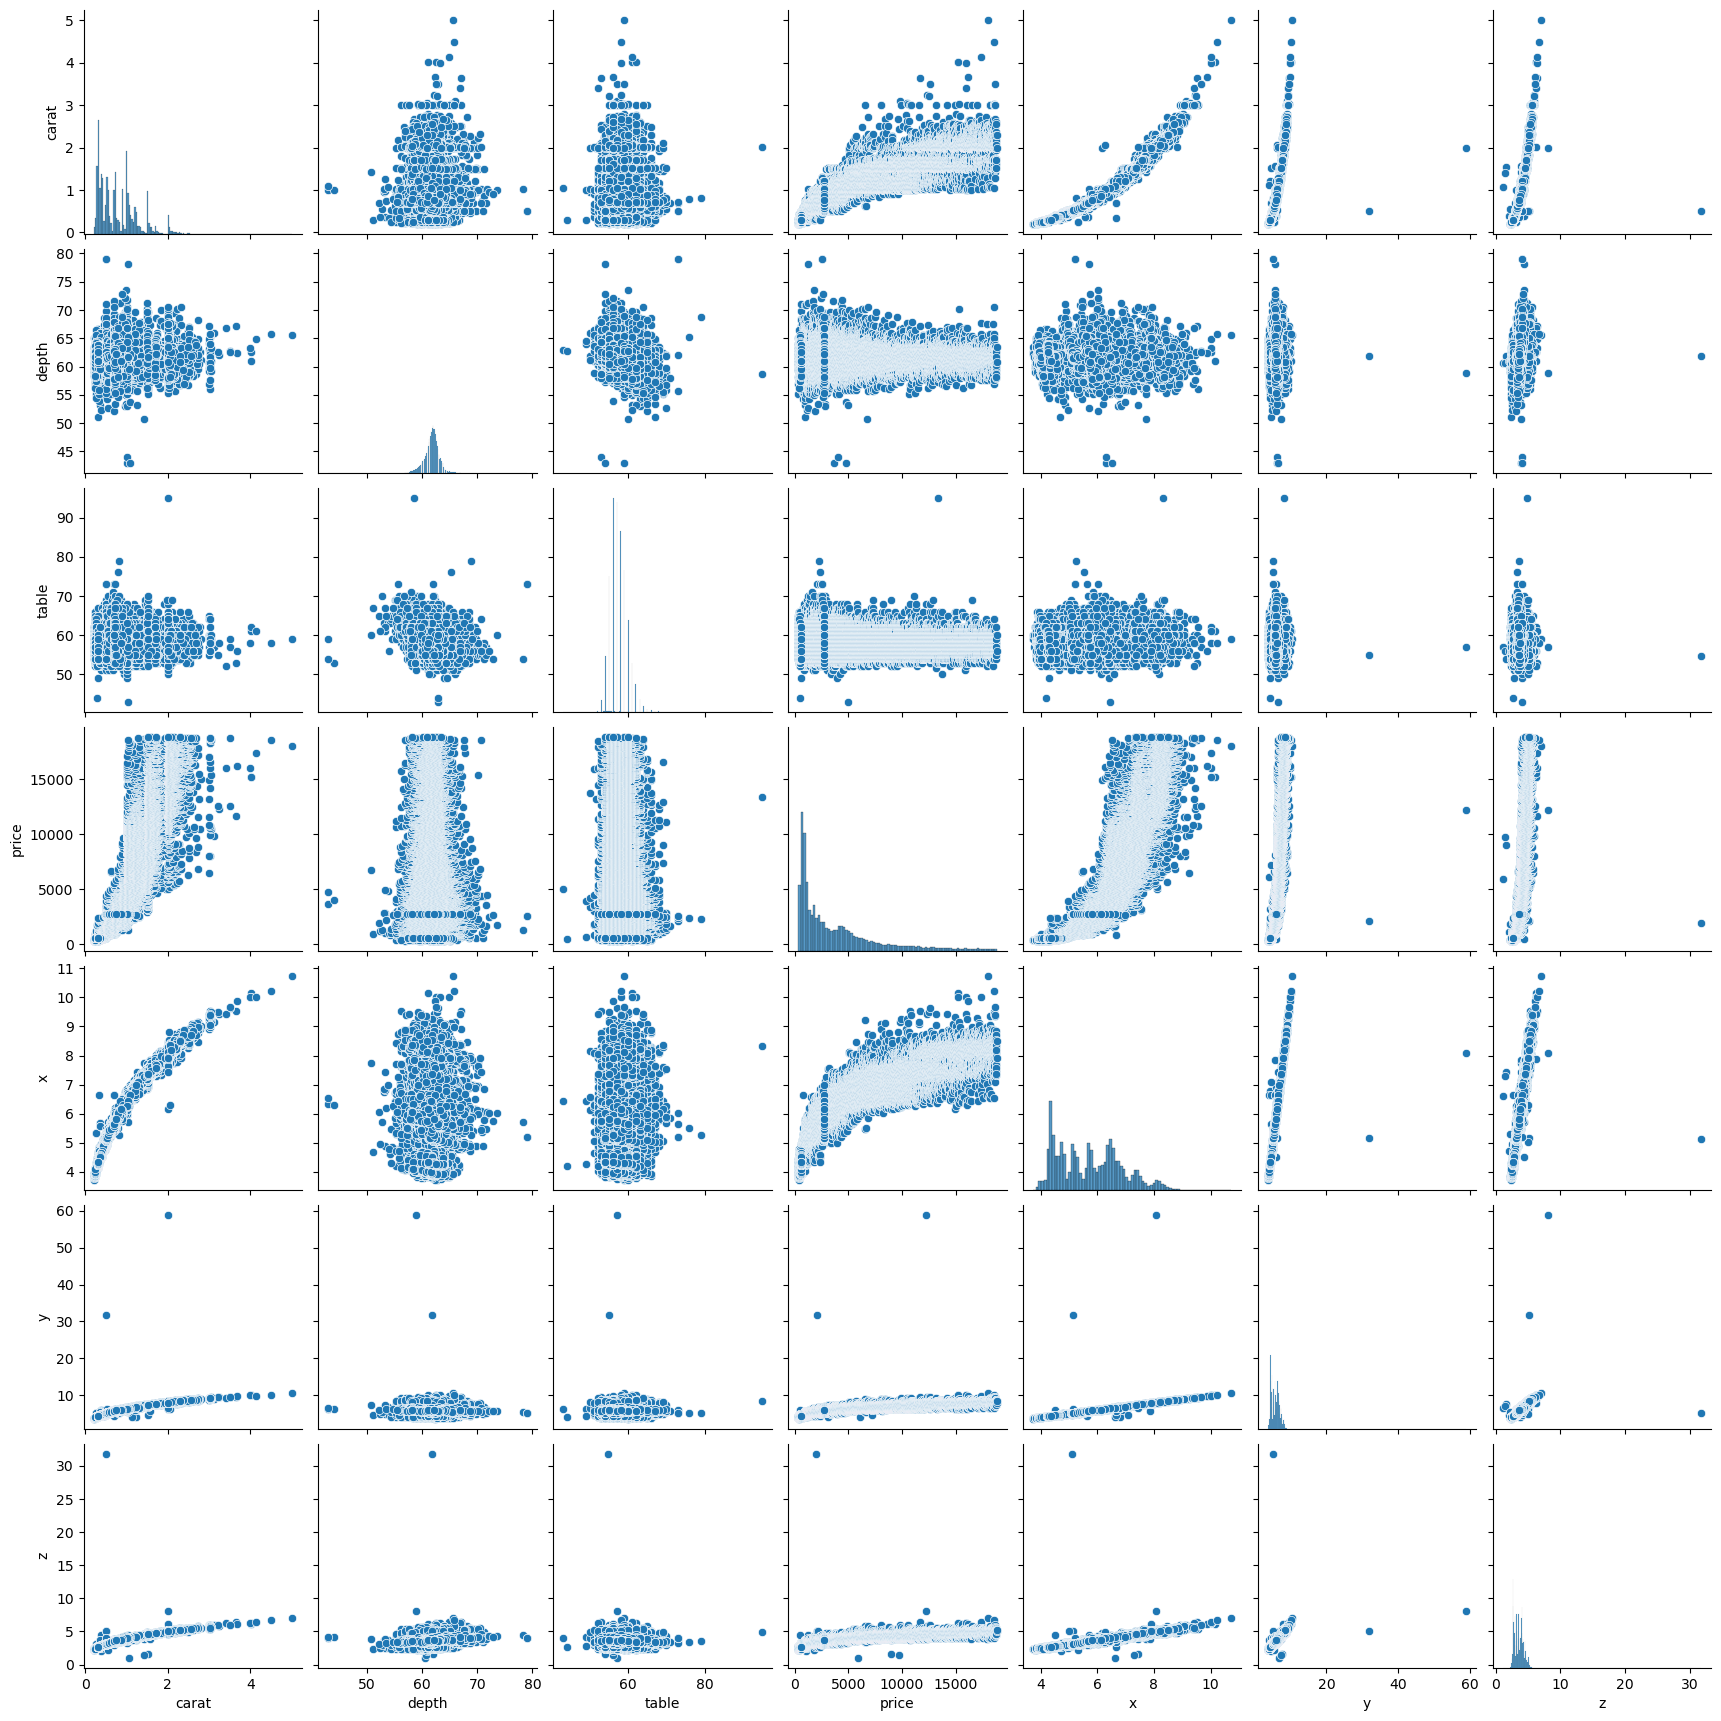

In [123]:
sns.pairplot(data)

/Users/mikolajguzek-szopa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


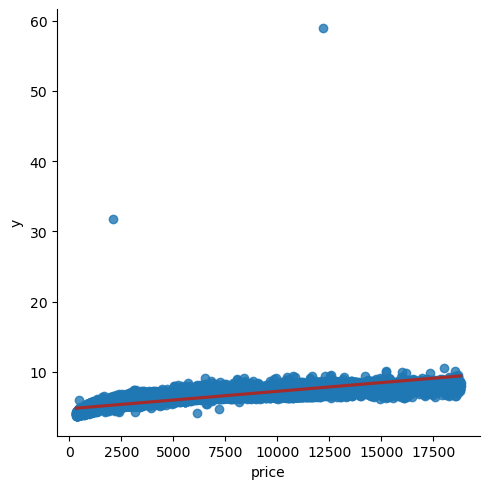

In [125]:
#Do znalezienia dokładnych wartości outlay'erów przyjrzę się blizej wykresom punktowym x, y, z, depth, table od price
#Naniosę na nie również linię regresji

#sns.lmplot(x='price', y='x', data=data, fit_reg=True, line_kws={'color':'brown'},legend = False)
sns.lmplot(x='price', y='y', data=data, fit_reg=True, line_kws={'color':'brown'},legend = False)
#sns.lmplot(x='price', y='z', data=data, fit_reg=True, line_kws={'color':'brown'},legend = False)
#sns.lmplot(x='price', y='depth', data=data, fit_reg=True, line_kws={'color':'brown'},legend = False)
#sns.lmplot(x='price', y='table', data=data, fit_reg=True, line_kws={'color':'brown'},legend = False)

In [95]:
#Usunięcie outlay'erów

#Widzimy wartości odstające dla atrybutów x, y, z, depth, table
#y<30, x<30, 2<z<30, 45<depth<75, 40<table<80
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(53907, 10)

/Users/mikolajguzek-szopa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


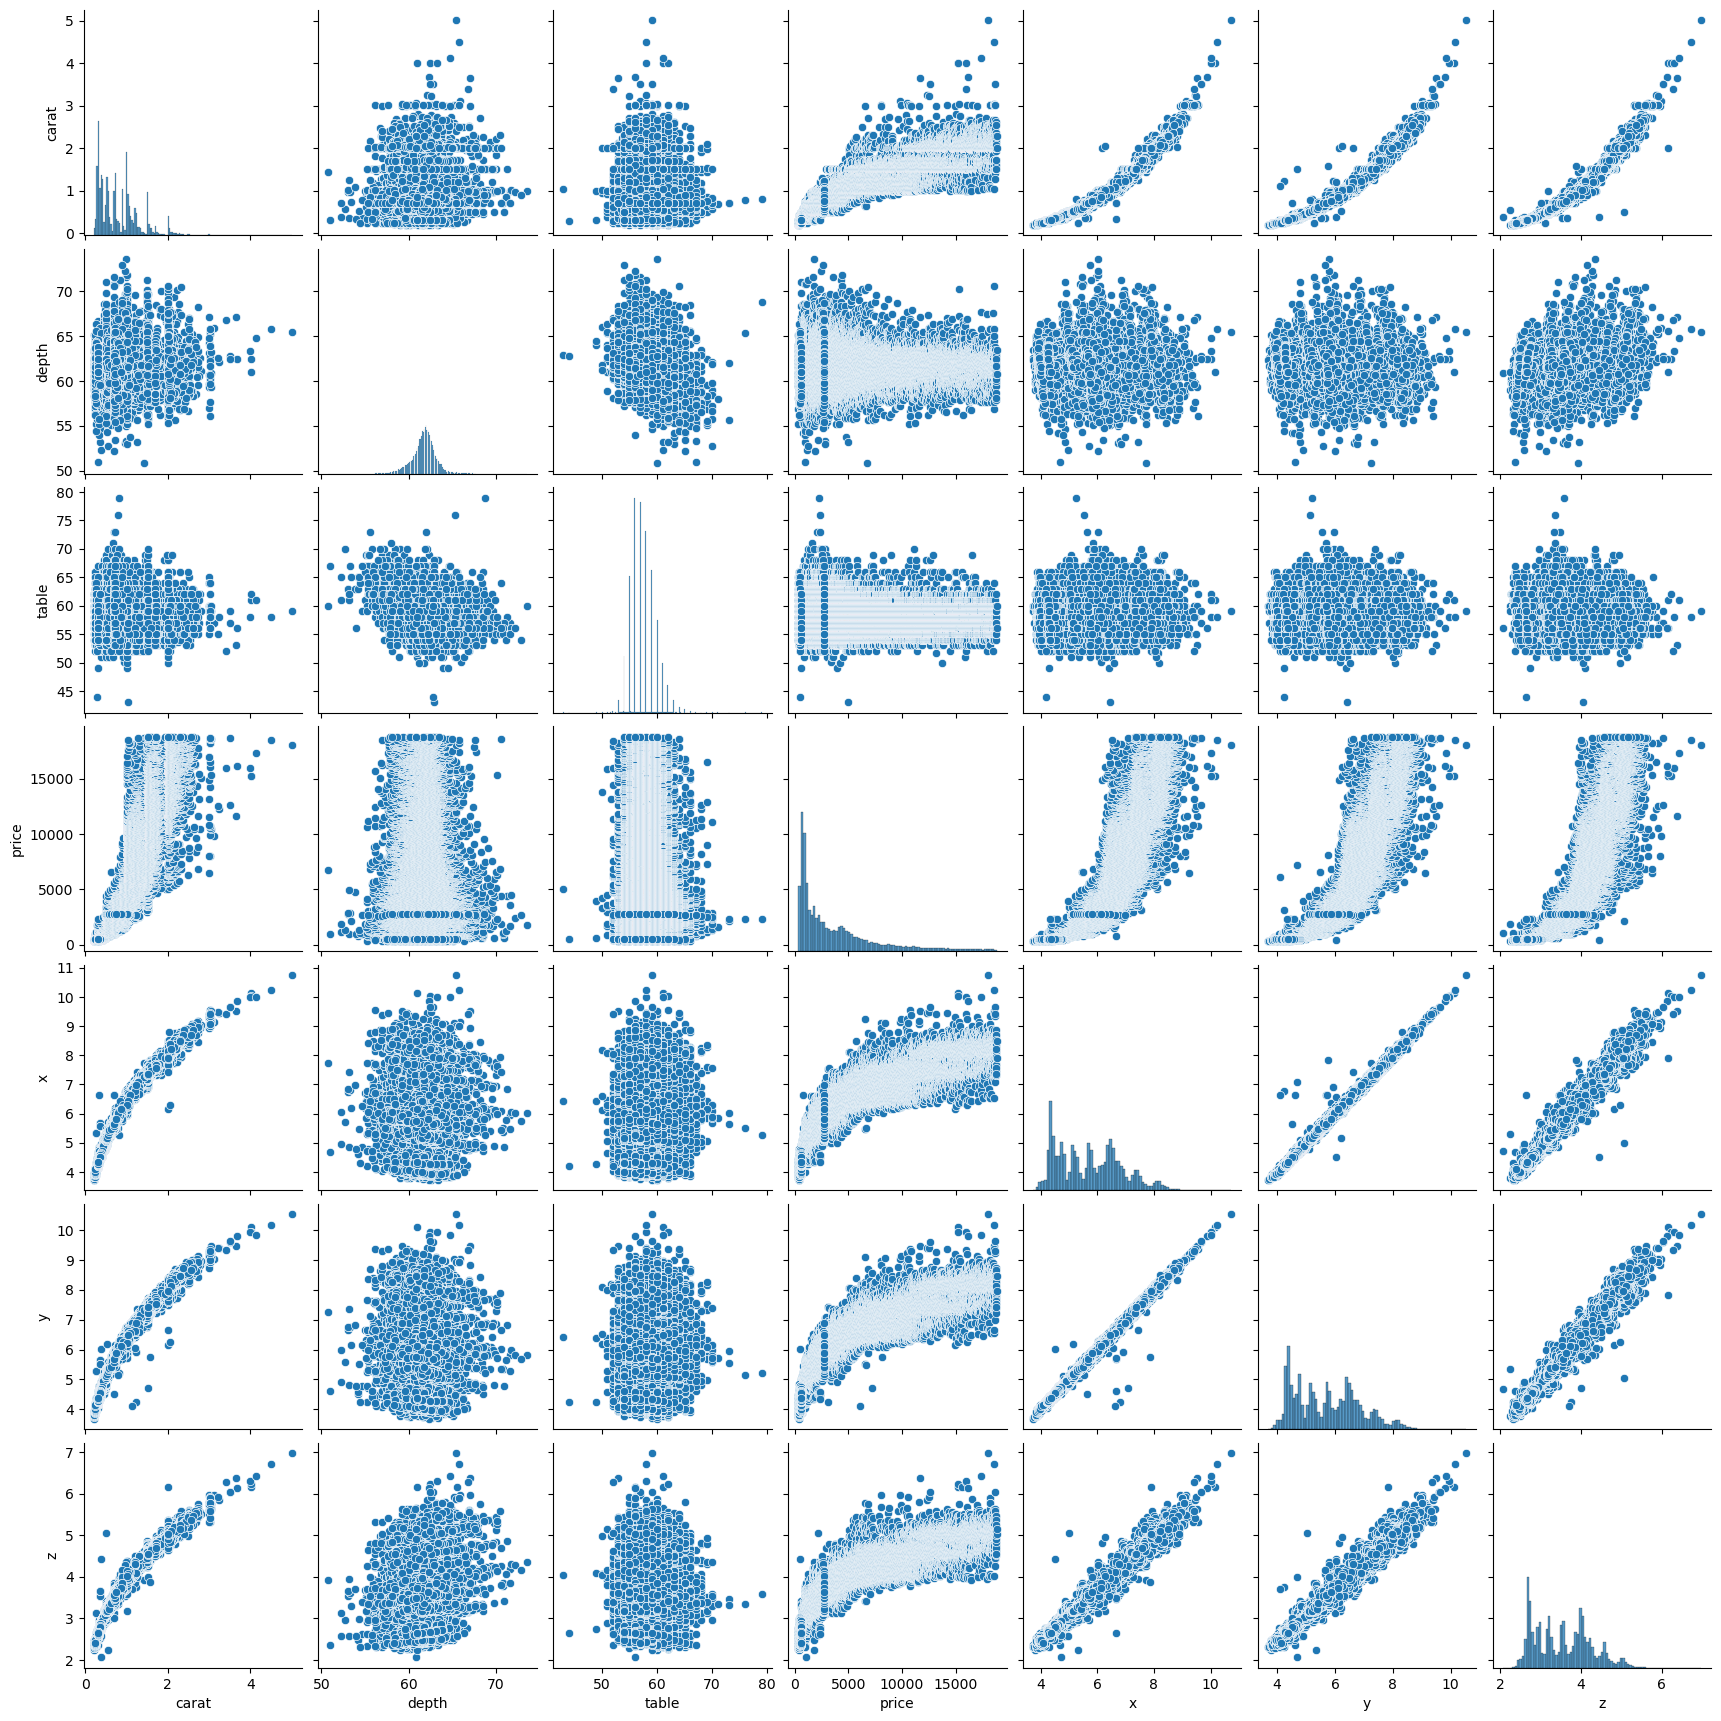

In [96]:
#Po usunięciu 
sns.pairplot(data)

<Axes: >

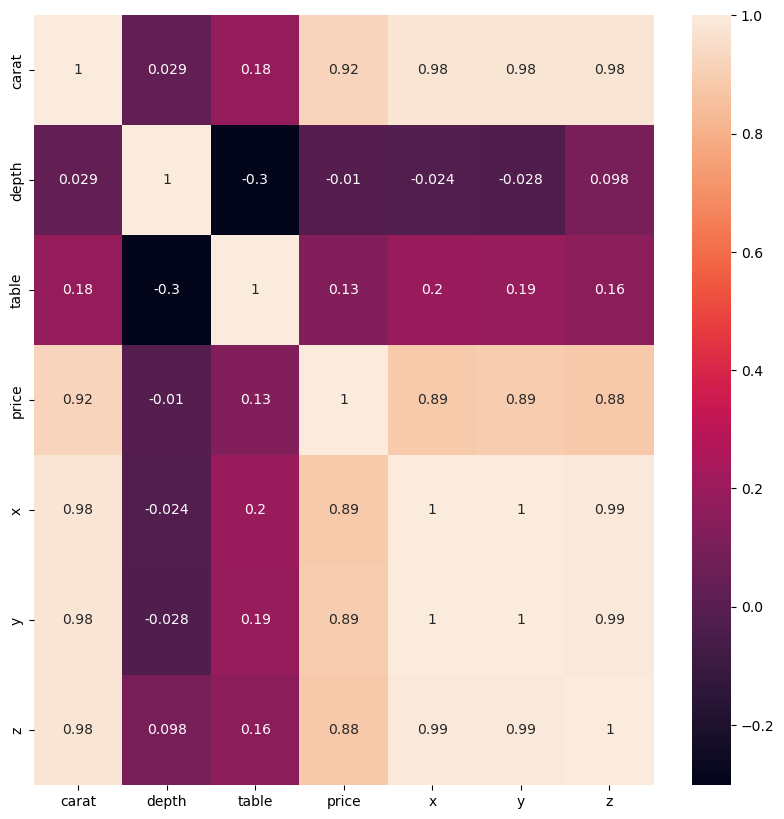

In [97]:
#Ocena Korelacji
plt.figure(figsize=(10,10),dpi = 100)
corr_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', ]
corr = data[corr_cols].corr()
sns.heatmap(corr, annot=corr)

In [98]:
#Widzimy, że cena diamentu, atrybut price jest bardzo silnie skorelowany z atrybutami x, y, z oraz carat. 
#Wymienione atrybuty są również bardzo silnie skorelowane między sobą.
#Między atrybutami depth oraz table, a price widzimy bardzo słabą korelacje

#Wnioski:
#Można rozważyć pominięcię depth oraz table przy uczeniu modelu.
#Można rozważyć pminięcie, którychś z atrybutów x, y, z, carat skoro są między sobą tak silnie skorelowane

In [132]:
#Do udoskonalenia

'''
zamiana na atrybuty ilościowe
cut: Ideal -> 2
     Premium -> 3 
color:  
     
clarity
'''
#sposób1
#label_encoder = LabelEncoder()
#data['cut'] = label_encoder.fit_transform(data['cut'])
#data['color'] = label_encoder.fit_transform(data['color'])
#data['clarity'] = label_encoder.fit_transform(data['clarity'])
#data

#sposób2
data_ONE = pd.get_dummies(data, prefix_sep='_', drop_first=True)
print(data_ONE.head())

print("\n")

data_TWO = pd.get_dummies(data, columns=['cut', 'color', 'clarity'])
print(data_TWO.head())
cut_columns = [col for col in data_TWO.columns if col.startswith('cut_')]
print("\nKolumny powstałe z atrybutu 'cut':")
print(data_TWO[cut_columns])

dataToPredConverted = pd.get_dummies(data, columns=data.columns[[1, 2, 3]])
print(dataToPredConverted.head())

print(type(data))

   carat  depth  table  price     x     y     z  cut_Good  cut_Ideal  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43     False       True   
1   0.21   59.8   61.0    326  3.89  3.84  2.31     False      False   
2   0.23   56.9   65.0    327  4.05  4.07  2.31      True      False   
3   0.29   62.4   58.0    334  4.20  4.23  2.63     False      False   
4   0.31   63.3   58.0    335  4.34  4.35  2.75      True      False   

   cut_Premium  ...  color_H  color_I  color_J  clarity_IF  clarity_SI1  \
0        False  ...    False    False    False       False        False   
1         True  ...    False    False    False       False         True   
2        False  ...    False    False    False       False        False   
3         True  ...    False     True    False       False        False   
4        False  ...    False    False     True       False        False   

   clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0         True        False        False     

Linear Regression R2:  0.919123451707416
Lasso Regression R2:  0.9191328425385995
AdaBoost Regression R2:  0.681574941798923
Ridge Regression R2:  0.9191252260385463
Random Forest R2:  0.9808587249923586


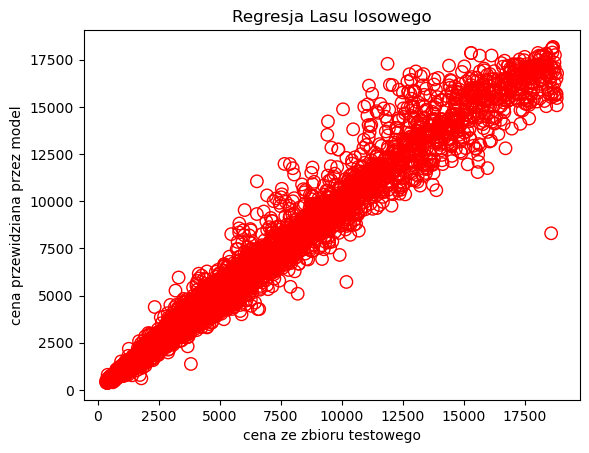

K-Neighbours Regression R2:  0.9553730615287804
Decision Tree Regression R2:  0.9636346730376999
XGB Regression R2:  0.980193342330307


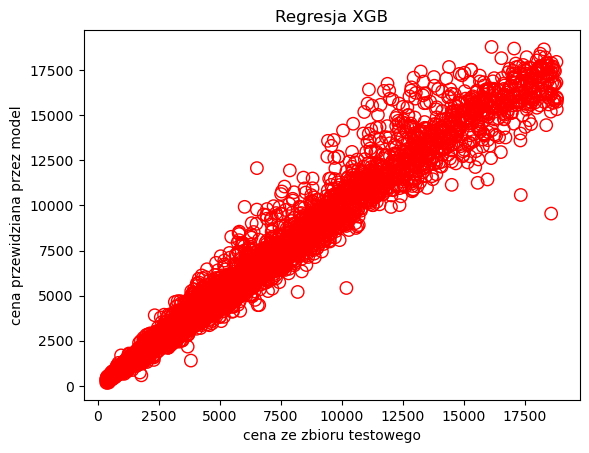

In [136]:
#Budowa modelu

#Odzielenie ceny od reszty atrybutów
x = data_TWO.drop(columns = ['price'])   #Usunięcie kolumn depth oraz table za dużo nie zmienia
y = data_TWO['price']

#Podział na zbiór uczący i testowy
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=48)

#Standaryzacja danych
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Tworzenie i trenowanie modelu regresji liniowej

#Regresja Liniowa
linReg = LinearRegression()
linReg.fit(x_train, y_train)

#predykcje na podstawie zbioru testowego
y_pred = linReg.predict(x_test)

#Ocena
r2 = r2_score(y_test, y_pred)
print('Linear Regression R2: ', r2)

#plt.figure(figsize=(6, 6))
#plt.scatter(y_test, y_pred, s=80, facecolors='none', edgecolors='r')

# Lasso
lasso = Lasso()
lasso.fit(x_train , y_train)
y_pred_lasso = lasso.predict(x_test)
r2 = r2_score(y_test, y_pred_lasso)

print('Lasso Regression R2: ', r2)
#plt.figure(figsize=(6, 6))
#plt.scatter(y_test, y_pred_lasso, s=80, facecolors='none', edgecolors='r')
 
# Adaboost classifier
adaboost = AdaBoostRegressor(n_estimators=1000)
adaboost.fit(x_train , y_train)
y_pred_adb = adaboost.predict(x_test)
r2 = r2_score(y_test, y_pred_adb)
 
print('AdaBoost Regression R2: ', r2)
#plt.figure(figsize=(6, 6))
#plt.scatter(y_test, y_pred_adb, s=80, facecolors='none', edgecolors='r')
 
# Ridge
ridge = Ridge()
ridge.fit(x_train , y_train)
y_pred_rid = ridge.predict(x_test)
r2 = r2_score(y_test, y_pred_rid)
 
print('Ridge Regression R2: ', r2)
#plt.figure(figsize=(6, 6))
#plt.scatter(y_test, y_pred_rid, s=80, facecolors='none', edgecolors='r') 
 
# Random forest
randomforest = RandomForestRegressor()
randomforest.fit(x_train , y_train)
y_pred_rand = randomforest .predict(x_test)
r2 = r2_score(y_test, y_pred_rand)
 
print('Random Forest R2: ', r2)
plt.scatter(y_test, y_pred_rand, s=80, facecolors='none', edgecolors='r')
plt.title('Regresja Lasu losowego')

# Wyświetlenie wykresu
plt.xlabel('cena ze zbioru testowego')
plt.ylabel('cena przewidziana przez model')
plt.show()
 
# K-Neighbours
kneighbours = KNeighborsRegressor()
kneighbours.fit(x_train , y_train)
y_pred_kN = kneighbours.predict(x_test)
r2 = r2_score(y_test, y_pred_kN)
 
print('K-Neighbours Regression R2: ', r2)
#plt.figure(figsize=(6, 6))
#plt.scatter(y_test, y_pred_kN, s=80, facecolors='none', edgecolors='r')

# DecisonTree
decisionTree = DecisionTreeRegressor()
decisionTree.fit(x_train , y_train)
y_pred_dT = decisionTree.predict(x_test)
r2 = r2_score(y_test, y_pred_dT)
 
print('Decision Tree Regression R2: ', r2)
#plt.figure(figsize=(6, 6))
#plt.scatter(y_test, y_pred_dT, s=80, facecolors='none', edgecolors='r')

# XGB
xgbreg = XGBRegressor()
xgbreg.fit(x_train , y_train)
y_pred_xgb = xgbreg.predict(x_test)
r2 = r2_score(y_test, y_pred_xgb)
 
print('XGB Regression R2: ', r2)
plt.scatter(y_test, y_pred_xgb, s=80, facecolors='none', edgecolors='r')
plt.title('Regresja XGB')

# Wyświetlenie wykresu
plt.xlabel('cena ze zbioru testowego')
plt.ylabel('cena przewidziana przez model')
plt.show()

In [108]:
#Wnioski
#Najlepsze wyniki R2 dla modelów regresji Random Forest i XGB 
#Na wykresach ceny ze zbioru testowego od ceny predykcjonowanej widzimy tego potwierdzenie
#Ostatecznie wybieram XGB Regressor, ponieważ na wykresie ma mniej odstających punktów od lini regresji niż Random Forest

In [109]:
dump(xgbreg, 'aplikacja_prognozująca/model/model_xgb_reg.joblib')
dump(x.columns.tolist(), 'aplikacja_prognozująca/model/columns.joblib')
dump(sc, 'aplikacja_prognozująca/model/scaler.joblib')
print(x.columns.tolist())
print(data.size)

['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']
539070


In [205]:
data9 = data.iloc[53919]
print(data9)

data9 = pd.get_dummies(data9, columns=['cut', 'color', 'clarity'])

model_columns = x.columns.tolist()

missing_cols = set(model_columns) - set(data9.columns)
for col in missing_cols:
    data9[col] = 0
data9 = data9[model_columns]

data9 = sc.transform(data9)

#print(data9)
pred2323 = linReg.predict(data9)
print(pred2323)

carat       0.75
cut        Ideal
color          D
clarity      SI2
depth       62.2
table       55.0
price       2757
x           5.83
y           5.87
z           3.64
Name: 53939, dtype: object
[7079.81907399 7079.81907399 7079.81907399 7079.81907399 7079.81907399
 7079.81907399 7079.81907399 7079.81907399 7079.81907399 7079.81907399]
